<a href="https://colab.research.google.com/github/fimoziq/fimozik/blob/main/var2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from pandas import read_csv
df = read_csv('_pythza2F.csv',parse_dates = True, index_col = 0,delimiter=',',decimal=',')
df.head()

,pr,fp
d;,,
2007-01-01,4.20,0
2007-02-01,3.93,1
2007-03-01,3.64,1
2007-04-01,3.53,1
2007-05-01,3.69,1


тренд-сезонная модель

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 48 entries, 2007-01-01 to 2010-12-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pr      48 non-null     float64
 1   fp      48 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


float64!!!!!!!!!!!! delimiter=',' ^ decimal=','

In [51]:
df_columns, df.columns = df.columns, ('y', 'ymaneken' )
df_index, df.index.name = df.index.name, 'date'
df.head()

,y,ymaneken
date,,
2007-01-01,4.20,0
2007-02-01,3.93,1
2007-03-01,3.64,1
2007-04-01,3.53,1
2007-05-01,3.69,1


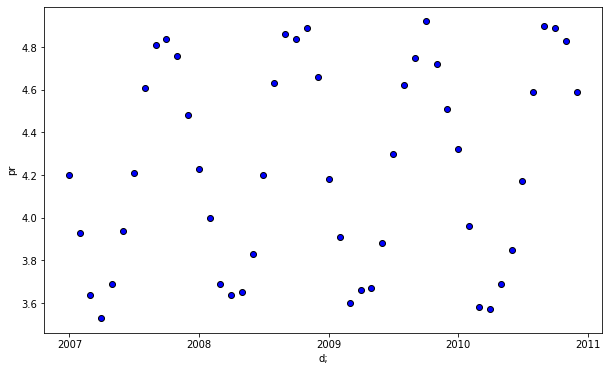

In [52]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10, 6))

plt.xlabel(df_index)
plt.ylabel(df_columns[0])

ax.xaxis.set_major_locator(mpl.dates.YearLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))

ax.plot(df['y'], marker = 'o', color = (0, 0, 0, 0), markerfacecolor = 'blue')
    
plt.show()

In [53]:
import numpy as np
df['t'] = np.arange(1, len(df) + 1)
df.head()

,y,ymaneken,t
date,,,
2007-01-01,4.20,0,1
2007-02-01,3.93,1,2
2007-03-01,3.64,1,3
2007-04-01,3.53,1,4
2007-05-01,3.69,1,5


In [54]:
import numpy as np
coef = np.polyfit(df['t'], df['y'], deg = 2)
coef

array([2.53497329e-05, 5.43936548e-03, 4.08457100e+00])

In [55]:
df['y^'] = coef[0] * df['t'] + coef[1] + coef[2]
df['y^'].head()

date
2007-01-01    4.090036
2007-02-01    4.090061
2007-03-01    4.090086
2007-04-01    4.090112
2007-05-01    4.090137
Name: y^, dtype: float64

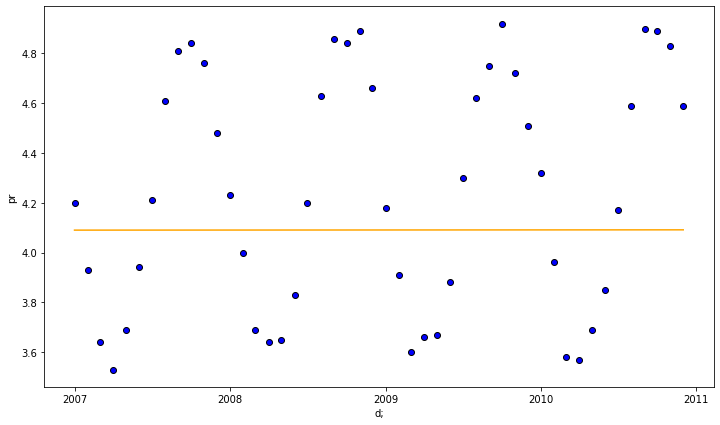

In [56]:
fig, ax = plt.subplots(figsize = (12, 7))

plt.xlabel(df_index)
plt.ylabel(df_columns[0])

ax.plot(df['y^'], color = 'orange')

ax.plot(df['y'], marker = 'o', color = (0, 0, 0, 0), markerfacecolor = 'blue')

ax.xaxis.set_major_locator(mpl.dates.YearLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))
    
plt.show()

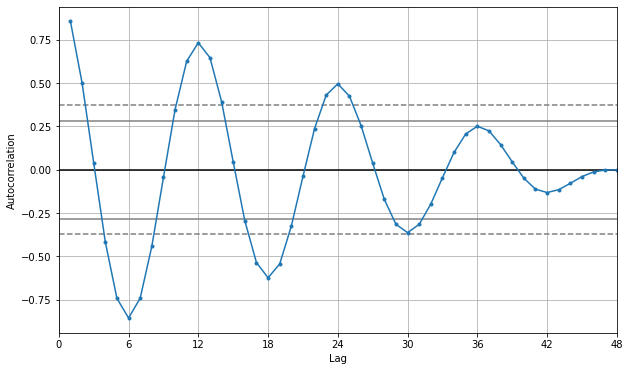

In [57]:
from pandas.plotting import autocorrelation_plot

fig, ax = plt.subplots(figsize = (10, 6))

autocorrelation_plot(df['y'], ax = ax, marker = '.')
ax.xaxis.set_major_locator(plt.MultipleLocator(6))
ax.set_xlim(0, 48)

plt.show()

по графику автокорреляции для ряда данных можно предположить, что лаг **сезонности** равен 12

In [58]:
import pandas as pd
s = 12
ses = (df['y']-df['y^'])
ses = np.array([np.mean(ses.iloc[k::s]) for k in range(s)])
ses = pd.DataFrame(ses - np.mean(ses), index = np.arange(1, s + 1))
ses

,0
1,-0.005277
2,-0.287803
3,-0.610328
4,-0.637853
5,-0.562879
6,-0.362904
7,-0.017929
8,0.374545
9,0.592020
10,0.634495


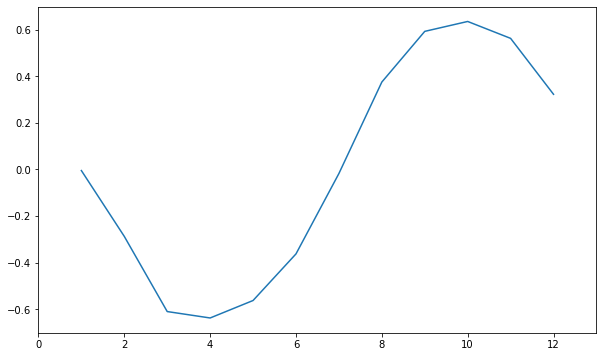

In [59]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_xlim(0, s + 1)
plt.plot(ses)
plt.show()

In [60]:
tmp = pd.concat([ses for _ in range(4)], ignore_index = True)
tmp.index = df.index

df['s'] = tmp
df['y^s'] = df['y^'] + df['s']

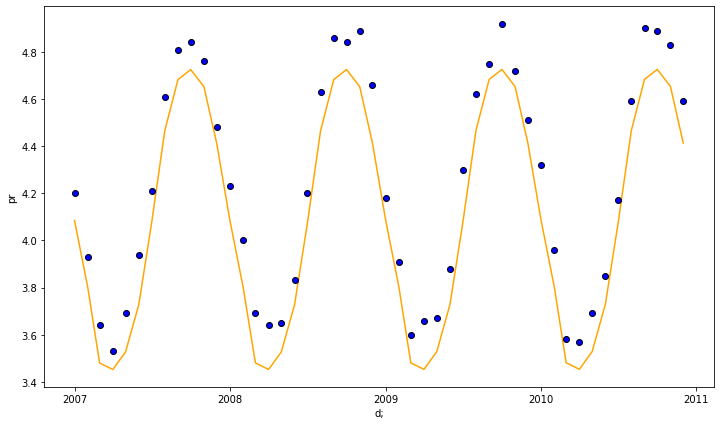

In [61]:
fig, ax = plt.subplots(figsize = (12, 7))

plt.xlabel(df_index)
plt.ylabel(df_columns[0])

ax.plot(df['y^s'], color = 'orange')

ax.plot(df['y'], marker = 'o', color = (0, 0, 0, 0), markerfacecolor = 'blue')

ax.xaxis.set_major_locator(mpl.dates.YearLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))
    
plt.show()

In [62]:
n = len(df)

x = np.arange(48, 60)

df_fv = pd.DataFrame({'y' : coef[0] * x + coef[1] + coef[2] + df['s'].iloc[:12].array}, index = pd.date_range(start = df.index[-1] + np.timedelta64(1, 'M'), 
                                    end   = df.index[-1] + np.timedelta64(13, 'M'), 
                                    freq  = 'MS'))

точечный и интервальный прогноз>

In [63]:
variance = np.sum(np.power(df['y'] - df['y^s'], 2)) / (n-1)
sigma =np.power(variance,0.5)
sigma

0.15626046016602904

условная дисперсия СНО

In [64]:
from scipy.stats import t
tstud=t.interval(0.95, len(df)-1)
list(tstud)

[-2.0117405104757546, 2.0117405104757546]

In [65]:
lower=list(tstud)[0]*sigma
lower

-0.31435549790158357

In [66]:
upper=list(tstud)[1]*sigma
upper

0.31435549790158357

In [67]:
df_fv['y-'] = df_fv['y'] + lower
df_fv['y+'] = df_fv['y'] + upper

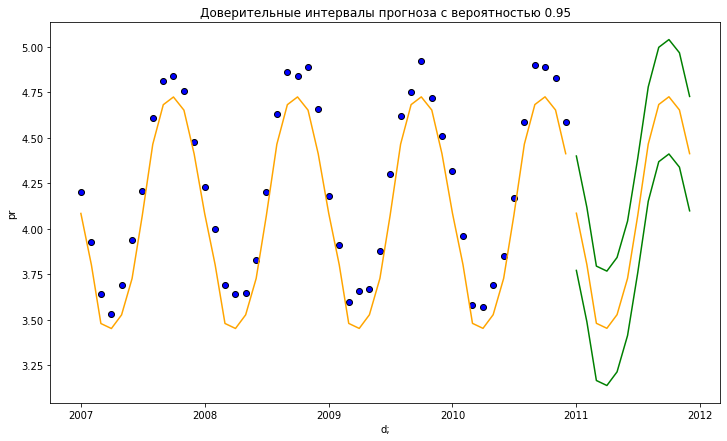

In [68]:
fig, ax = plt.subplots(figsize = (12, 7))

plt.title('Доверительные интервалы прогноза с вероятностью 0.95')
plt.xlabel(df_index)
plt.ylabel(df_columns[0])

ax.plot(df_fv['y-'], color = 'green')
ax.plot(df_fv['y'],  color = 'orange')
ax.plot(df_fv['y+'], color = 'green')

ax.plot(df['y'], marker = 'o', color = (0, 0, 0, 0), markerfacecolor = 'blue')
ax.plot(df['y^s'], color = 'orange')

ax.xaxis.set_major_locator(mpl.dates.YearLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))
    
plt.show()

In [69]:
1 - np.sum(np.power(df['y'] - df['y^s'], 2)) / np.sum(np.power(df['y'] - np.mean(df['y']), 2))

0.8917854334635441

коэф. детерминации 